<a href="https://colab.research.google.com/github/xtianu/CV_Tirana/blob/main/M2_Image%20Segmentation/p1_Thresholding_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULE 2: IMAGE SEGMENTATION
Christian Mata, PhD

# PART 1: SEGMENTATION BY THRESHOLDING

In [1]:
import skimage as sk
import numpy as np

I = sk.data.camera() # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],1)) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],1))
print('The shape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],1))

v_I.shape

Here N = 262144 and d = 1
The shape of the array should be 262144 x 1


(262144, 1)

## Manual threshold (single)

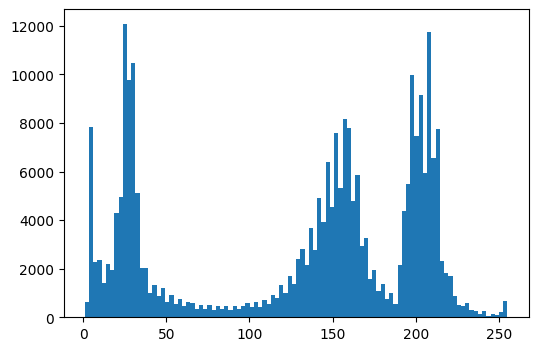

In [2]:
import matplotlib.pyplot as plt


flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.show()

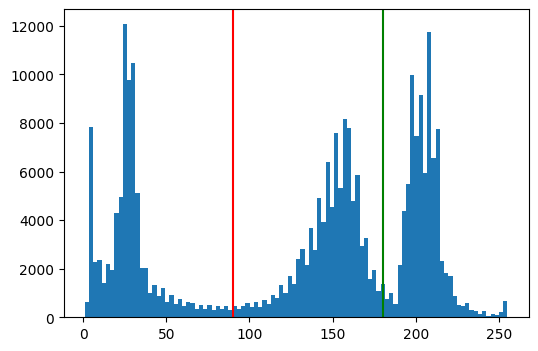

In [3]:

T1 = 90
T2 = 180

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.axvline(T1,color='r')
plt.axvline(T2,color='g')
plt.show()


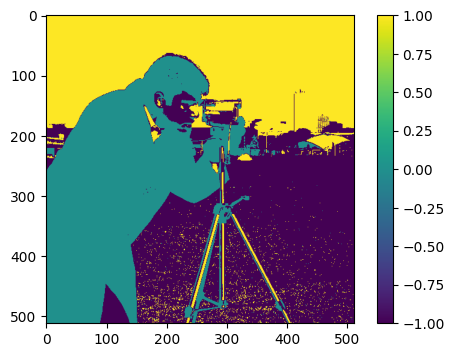

In [4]:
data_color = np.zeros(np.shape(I))
data_color[(I>T2)] = 1
data_color[(I>T1) & (I<T2)] = -1
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(data_color)
plt.colorbar()
plt.show()

## Otsu optimal threshold

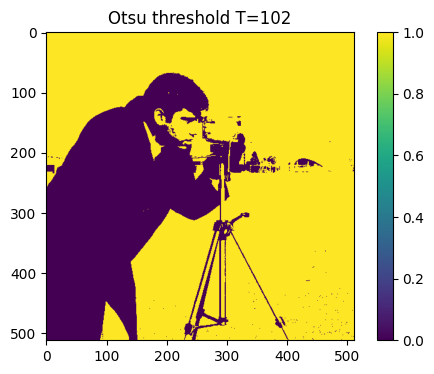

In [5]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

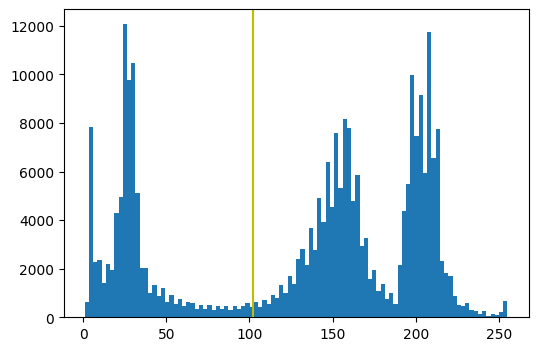

In [6]:

flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.axvline(thresh,color='y')
plt.show()


## Otsu multiple thresholds

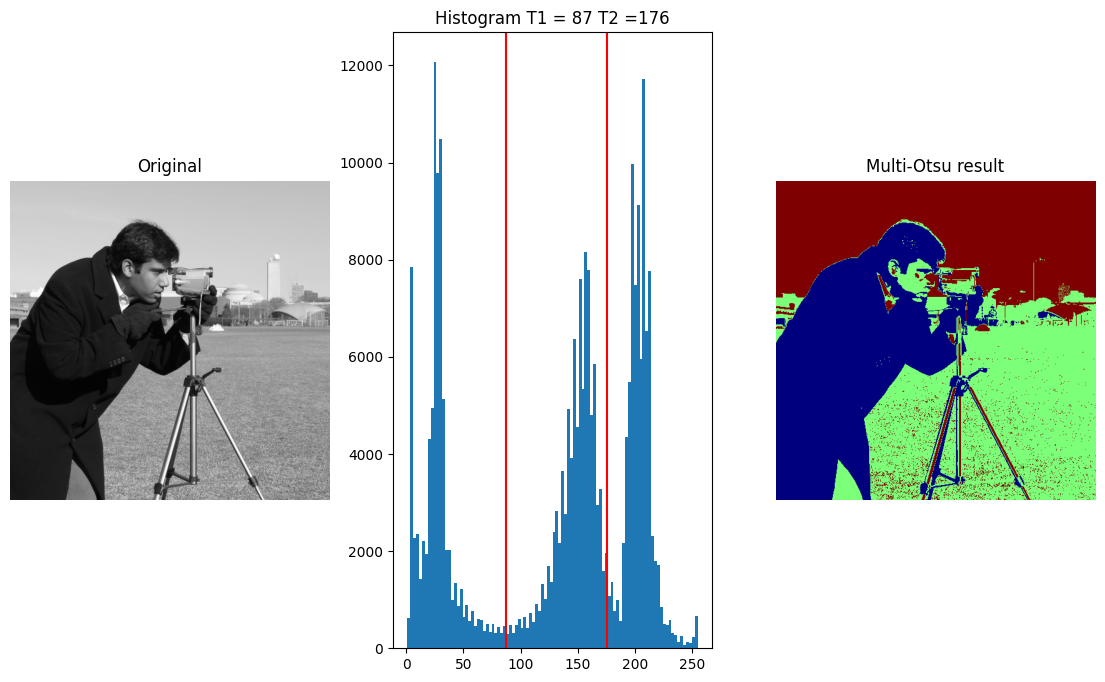

In [7]:
from skimage.filters import threshold_multiotsu

# Applying multi-Otsu threshold for the default value, generating
# three classes by default
thresholds = threshold_multiotsu(I)

# Using the threshold values, we generate the three regions.
regions = np.digitize(I, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting the original image.
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(flat_data, bins=100,range=[1,flat_data.max()])
ax[1].set_title('Histogram T1 = {} T2 ={}'.format(thresholds[0],thresholds[1]))
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()
